# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 128, 128, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""

LEARNING_RATE = [1e-1, 1e-2]
EPOCHS = 100
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)          

196/196 [==============================] - 4s 19ms/step - loss: 1.5389 - accuracy: 0.4663 - val_loss: 1.6431 - val_accuracy: 0.4273
Epoch 49/100
196/196 [==============================] - 4s 21ms/step - loss: 1.5393 - accuracy: 0.4674 - val_loss: 1.6253 - val_accuracy: 0.4491
Epoch 50/100
196/196 [==============================] - 5s 24ms/step - loss: 1.5386 - accuracy: 0.4675 - val_loss: 1.6570 - val_accuracy: 0.4144
Epoch 51/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5548 - accuracy: 0.4619 - val_loss: 1.6880 - val_accuracy: 0.4165
Epoch 52/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5603 - accuracy: 0.4632 - val_loss: 1.6790 - val_accuracy: 0.4166
Epoch 53/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5348 - accuracy: 0.4710 - val_loss: 1.6798 - val_accuracy: 0.4129
Epoch 54/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5460 - accuracy: 0.4672 - val_loss: 1.6595 - val_accuracy: 0.443

Epoch 1/100
196/196 [==============================] - 4s 23ms/step - loss: 1.9068 - accuracy: 0.3086 - val_loss: 1.7708 - val_accuracy: 0.3661
Epoch 2/100
196/196 [==============================] - 4s 20ms/step - loss: 1.6383 - accuracy: 0.4119 - val_loss: 1.8029 - val_accuracy: 0.3759
Epoch 3/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5517 - accuracy: 0.4491 - val_loss: 1.5309 - val_accuracy: 0.4518
Epoch 4/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4793 - accuracy: 0.4724 - val_loss: 1.6411 - val_accuracy: 0.4159
Epoch 5/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4391 - accuracy: 0.4870 - val_loss: 1.5049 - val_accuracy: 0.4635
Epoch 6/100
196/196 [==============================] - 4s 19ms/step - loss: 1.3922 - accuracy: 0.5040 - val_loss: 1.5012 - val_accuracy: 0.4668
Epoch 7/100
196/196 [==============================] - 4s 19ms/step - loss: 1.3565 - accuracy: 0.5178 - val_loss: 1.4279 - val_accuracy:

196/196 [==============================] - 4s 19ms/step - loss: 0.4844 - accuracy: 0.8243 - val_loss: 2.0192 - val_accuracy: 0.5202
Epoch 58/100
196/196 [==============================] - 4s 19ms/step - loss: 0.4853 - accuracy: 0.8237 - val_loss: 2.0606 - val_accuracy: 0.5218
Epoch 59/100
196/196 [==============================] - 4s 19ms/step - loss: 0.4745 - accuracy: 0.8285 - val_loss: 2.2507 - val_accuracy: 0.5235
Epoch 60/100
196/196 [==============================] - 4s 19ms/step - loss: 0.4538 - accuracy: 0.8358 - val_loss: 2.1854 - val_accuracy: 0.5190
Epoch 61/100
196/196 [==============================] - 4s 19ms/step - loss: 0.4504 - accuracy: 0.8371 - val_loss: 2.1787 - val_accuracy: 0.5186
Epoch 62/100
196/196 [==============================] - 4s 19ms/step - loss: 0.4435 - accuracy: 0.8385 - val_loss: 2.1664 - val_accuracy: 0.5188
Epoch 63/100
196/196 [==============================] - 4s 19ms/step - loss: 0.4333 - accuracy: 0.8424 - val_loss: 2.3525 - val_accuracy: 0.518

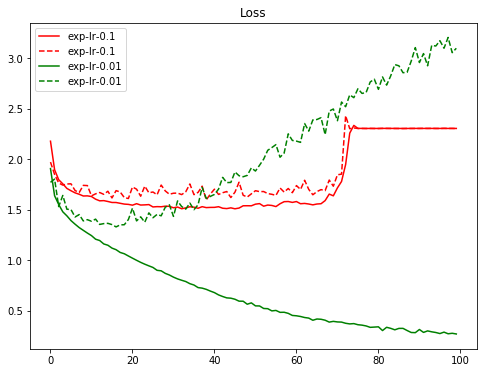

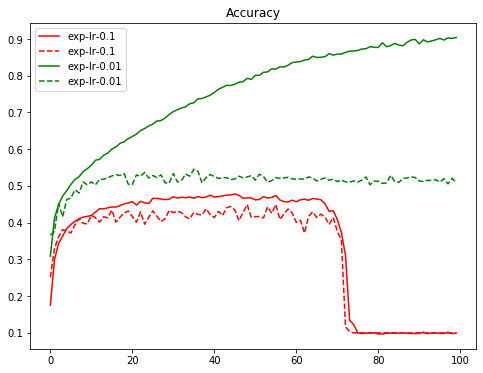

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [15]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-2, 1e-3]
rho=0.9
decay=0.0


In [16]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr, rho=0.9, epsilon=None, decay=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.010000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)          

196/196 [==============================] - 6s 29ms/step - loss: 1.8245 - accuracy: 0.3209 - val_loss: 1.8228 - val_accuracy: 0.3228
Epoch 49/100
196/196 [==============================] - 6s 29ms/step - loss: 1.8231 - accuracy: 0.3230 - val_loss: 1.8691 - val_accuracy: 0.3035
Epoch 50/100
196/196 [==============================] - 6s 29ms/step - loss: 1.8188 - accuracy: 0.3239 - val_loss: 1.9214 - val_accuracy: 0.2794
Epoch 51/100
196/196 [==============================] - 6s 30ms/step - loss: 1.8213 - accuracy: 0.3242 - val_loss: 1.8627 - val_accuracy: 0.3127
Epoch 52/100
196/196 [==============================] - 6s 28ms/step - loss: 1.8204 - accuracy: 0.3232 - val_loss: 1.9790 - val_accuracy: 0.2906
Epoch 53/100
196/196 [==============================] - 6s 30ms/step - loss: 1.8293 - accuracy: 0.3183 - val_loss: 1.8560 - val_accuracy: 0.3070
Epoch 54/100
196/196 [==============================] - 6s 29ms/step - loss: 1.8231 - accuracy: 0.3223 - val_loss: 1.8813 - val_accuracy: 0.288

Epoch 1/100
196/196 [==============================] - 6s 32ms/step - loss: 2.1682 - accuracy: 0.1994 - val_loss: 2.2841 - val_accuracy: 0.1760
Epoch 2/100
196/196 [==============================] - 6s 28ms/step - loss: 1.9156 - accuracy: 0.3031 - val_loss: 1.9081 - val_accuracy: 0.3012
Epoch 3/100
196/196 [==============================] - 6s 29ms/step - loss: 1.8206 - accuracy: 0.3424 - val_loss: 1.8789 - val_accuracy: 0.2950
Epoch 4/100
196/196 [==============================] - 6s 29ms/step - loss: 1.7608 - accuracy: 0.3624 - val_loss: 1.7599 - val_accuracy: 0.3646
Epoch 5/100
196/196 [==============================] - 6s 28ms/step - loss: 1.7010 - accuracy: 0.3877 - val_loss: 1.7225 - val_accuracy: 0.3790
Epoch 6/100
196/196 [==============================] - 6s 28ms/step - loss: 1.6570 - accuracy: 0.4015 - val_loss: 1.8276 - val_accuracy: 0.3661
Epoch 7/100
196/196 [==============================] - 6s 28ms/step - loss: 1.6158 - accuracy: 0.4192 - val_loss: 1.9137 - val_accuracy:

196/196 [==============================] - 5s 27ms/step - loss: 0.8063 - accuracy: 0.7080 - val_loss: 2.1634 - val_accuracy: 0.4728
Epoch 58/100
196/196 [==============================] - 5s 27ms/step - loss: 0.7926 - accuracy: 0.7117 - val_loss: 1.9991 - val_accuracy: 0.4691
Epoch 59/100
196/196 [==============================] - 5s 27ms/step - loss: 0.7907 - accuracy: 0.7132 - val_loss: 2.1057 - val_accuracy: 0.4733
Epoch 60/100
196/196 [==============================] - 5s 28ms/step - loss: 0.7759 - accuracy: 0.7158 - val_loss: 2.2125 - val_accuracy: 0.4666
Epoch 61/100
196/196 [==============================] - 5s 27ms/step - loss: 0.7784 - accuracy: 0.7156 - val_loss: 2.1476 - val_accuracy: 0.4752
Epoch 62/100
196/196 [==============================] - 5s 28ms/step - loss: 0.7620 - accuracy: 0.7205 - val_loss: 2.4111 - val_accuracy: 0.4625
Epoch 63/100
196/196 [==============================] - 5s 28ms/step - loss: 0.7592 - accuracy: 0.7231 - val_loss: 2.2279 - val_accuracy: 0.485

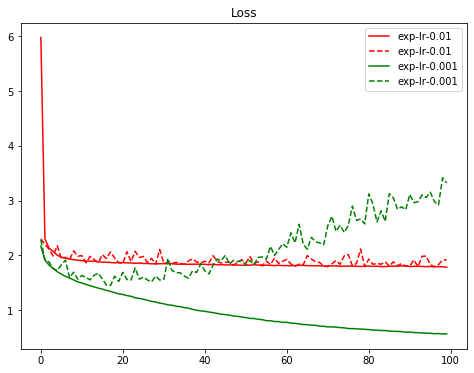

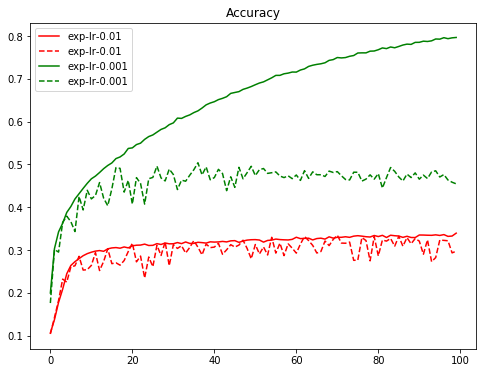

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [18]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-2,1e-3]



In [19]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.010000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)          

196/196 [==============================] - 4s 19ms/step - loss: 1.4257 - accuracy: 0.4886 - val_loss: 1.5652 - val_accuracy: 0.4566
Epoch 49/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4244 - accuracy: 0.4921 - val_loss: 1.5321 - val_accuracy: 0.4640
Epoch 50/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4247 - accuracy: 0.4937 - val_loss: 1.5468 - val_accuracy: 0.4529
Epoch 51/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4263 - accuracy: 0.4920 - val_loss: 1.5164 - val_accuracy: 0.4648
Epoch 52/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4114 - accuracy: 0.4936 - val_loss: 1.5344 - val_accuracy: 0.4610
Epoch 53/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4073 - accuracy: 0.4992 - val_loss: 1.5556 - val_accuracy: 0.4570
Epoch 54/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4048 - accuracy: 0.4999 - val_loss: 1.5513 - val_accuracy: 0.457

Epoch 1/100
196/196 [==============================] - 4s 20ms/step - loss: 1.9255 - accuracy: 0.2986 - val_loss: 1.8356 - val_accuracy: 0.3488
Epoch 2/100
196/196 [==============================] - 4s 19ms/step - loss: 1.7042 - accuracy: 0.3889 - val_loss: 1.6496 - val_accuracy: 0.4105
Epoch 3/100
196/196 [==============================] - 4s 19ms/step - loss: 1.6097 - accuracy: 0.4248 - val_loss: 1.5937 - val_accuracy: 0.4281
Epoch 4/100
196/196 [==============================] - 4s 18ms/step - loss: 1.5631 - accuracy: 0.4402 - val_loss: 1.5638 - val_accuracy: 0.4435
Epoch 5/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5179 - accuracy: 0.4562 - val_loss: 1.5139 - val_accuracy: 0.4620
Epoch 6/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4779 - accuracy: 0.4715 - val_loss: 1.4823 - val_accuracy: 0.4686
Epoch 7/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4460 - accuracy: 0.4815 - val_loss: 1.4929 - val_accuracy:

196/196 [==============================] - 4s 19ms/step - loss: 0.6843 - accuracy: 0.7500 - val_loss: 1.8451 - val_accuracy: 0.5087
Epoch 58/100
196/196 [==============================] - 4s 19ms/step - loss: 0.6834 - accuracy: 0.7520 - val_loss: 1.8039 - val_accuracy: 0.5110
Epoch 59/100
196/196 [==============================] - 4s 19ms/step - loss: 0.6690 - accuracy: 0.7589 - val_loss: 1.8602 - val_accuracy: 0.5111
Epoch 60/100
196/196 [==============================] - 4s 19ms/step - loss: 0.6555 - accuracy: 0.7629 - val_loss: 1.9323 - val_accuracy: 0.5090
Epoch 61/100
196/196 [==============================] - 4s 19ms/step - loss: 0.6346 - accuracy: 0.7720 - val_loss: 1.8889 - val_accuracy: 0.5056
Epoch 62/100
196/196 [==============================] - 4s 19ms/step - loss: 0.6470 - accuracy: 0.7658 - val_loss: 1.9421 - val_accuracy: 0.5087
Epoch 63/100
196/196 [==============================] - 4s 19ms/step - loss: 0.6264 - accuracy: 0.7744 - val_loss: 1.9985 - val_accuracy: 0.508

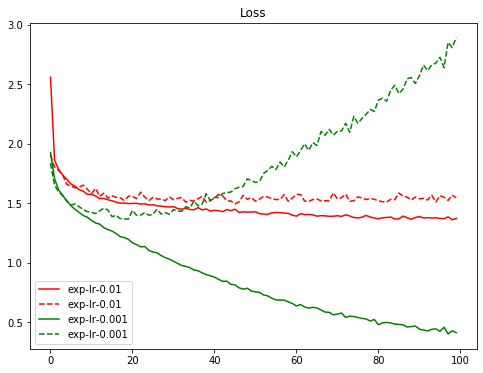

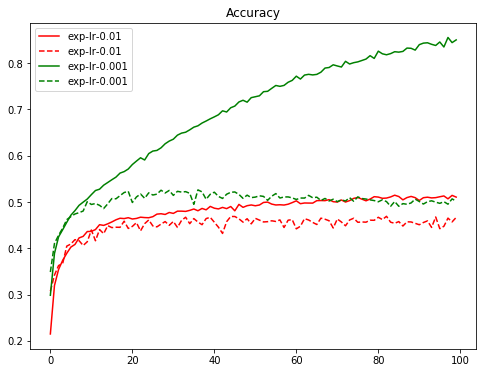

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [24]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1,1e-2,1e-3,1e-4,1e-5]

In [25]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)          

196/196 [==============================] - 4s 18ms/step - loss: 1.0250 - accuracy: 0.6371 - val_loss: 1.3751 - val_accuracy: 0.5249
Epoch 49/100
196/196 [==============================] - 4s 18ms/step - loss: 1.0169 - accuracy: 0.6402 - val_loss: 1.6012 - val_accuracy: 0.4800
Epoch 50/100
196/196 [==============================] - 4s 19ms/step - loss: 1.0025 - accuracy: 0.6443 - val_loss: 1.3508 - val_accuracy: 0.5272
Epoch 51/100
196/196 [==============================] - 4s 18ms/step - loss: 0.9899 - accuracy: 0.6498 - val_loss: 1.4267 - val_accuracy: 0.5155
Epoch 52/100
196/196 [==============================] - 4s 18ms/step - loss: 0.9802 - accuracy: 0.6526 - val_loss: 1.4682 - val_accuracy: 0.4988
Epoch 53/100
196/196 [==============================] - 4s 18ms/step - loss: 0.9716 - accuracy: 0.6558 - val_loss: 1.4229 - val_accuracy: 0.5198
Epoch 54/100
196/196 [==============================] - 4s 18ms/step - loss: 0.9670 - accuracy: 0.6558 - val_loss: 1.5366 - val_accuracy: 0.486

Epoch 1/100
196/196 [==============================] - 4s 19ms/step - loss: 2.0849 - accuracy: 0.2396 - val_loss: 1.9601 - val_accuracy: 0.2931
Epoch 2/100
196/196 [==============================] - 4s 19ms/step - loss: 1.8935 - accuracy: 0.3187 - val_loss: 2.0111 - val_accuracy: 0.2598
Epoch 3/100
196/196 [==============================] - 4s 19ms/step - loss: 1.8019 - accuracy: 0.3544 - val_loss: 1.7771 - val_accuracy: 0.3637
Epoch 4/100
196/196 [==============================] - 4s 19ms/step - loss: 1.7347 - accuracy: 0.3796 - val_loss: 1.7010 - val_accuracy: 0.3917
Epoch 5/100
196/196 [==============================] - 4s 18ms/step - loss: 1.6898 - accuracy: 0.3964 - val_loss: 1.8190 - val_accuracy: 0.3554
Epoch 6/100
196/196 [==============================] - 4s 19ms/step - loss: 1.6537 - accuracy: 0.4126 - val_loss: 1.6814 - val_accuracy: 0.3820
Epoch 7/100
196/196 [==============================] - 4s 18ms/step - loss: 1.6141 - accuracy: 0.4277 - val_loss: 1.6376 - val_accuracy:

196/196 [==============================] - 4s 18ms/step - loss: 0.9222 - accuracy: 0.6724 - val_loss: 1.4359 - val_accuracy: 0.5192
Epoch 58/100
196/196 [==============================] - 4s 19ms/step - loss: 0.9145 - accuracy: 0.6758 - val_loss: 1.5858 - val_accuracy: 0.4797
Epoch 59/100
196/196 [==============================] - 4s 18ms/step - loss: 0.9070 - accuracy: 0.6786 - val_loss: 1.4151 - val_accuracy: 0.5233
Epoch 60/100
196/196 [==============================] - 4s 19ms/step - loss: 0.8897 - accuracy: 0.6841 - val_loss: 1.4673 - val_accuracy: 0.5024
Epoch 61/100
196/196 [==============================] - 4s 18ms/step - loss: 0.8844 - accuracy: 0.6877 - val_loss: 1.5249 - val_accuracy: 0.5111
Epoch 62/100
196/196 [==============================] - 4s 19ms/step - loss: 0.8694 - accuracy: 0.6927 - val_loss: 1.5482 - val_accuracy: 0.5092
Epoch 63/100
196/196 [==============================] - 4s 18ms/step - loss: 0.8709 - accuracy: 0.6895 - val_loss: 1.6479 - val_accuracy: 0.483

196/196 [==============================] - 4s 19ms/step - loss: 1.7322 - accuracy: 0.3787 - val_loss: 1.7290 - val_accuracy: 0.3831
Epoch 5/100
196/196 [==============================] - 4s 18ms/step - loss: 1.6928 - accuracy: 0.3949 - val_loss: 1.8309 - val_accuracy: 0.3241
Epoch 6/100
196/196 [==============================] - 4s 18ms/step - loss: 1.6518 - accuracy: 0.4110 - val_loss: 1.6818 - val_accuracy: 0.3930
Epoch 7/100
196/196 [==============================] - 4s 18ms/step - loss: 1.6221 - accuracy: 0.4218 - val_loss: 1.5939 - val_accuracy: 0.4327
Epoch 8/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5849 - accuracy: 0.4355 - val_loss: 1.5818 - val_accuracy: 0.4346
Epoch 9/100
196/196 [==============================] - 4s 18ms/step - loss: 1.5645 - accuracy: 0.4435 - val_loss: 1.5850 - val_accuracy: 0.4397
Epoch 10/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5403 - accuracy: 0.4507 - val_loss: 1.5216 - val_accuracy: 0.4528
Epo

196/196 [==============================] - 4s 19ms/step - loss: 0.9136 - accuracy: 0.6760 - val_loss: 1.5150 - val_accuracy: 0.4959
Epoch 61/100
196/196 [==============================] - 4s 19ms/step - loss: 0.8990 - accuracy: 0.6811 - val_loss: 1.5588 - val_accuracy: 0.4859
Epoch 62/100
196/196 [==============================] - 4s 19ms/step - loss: 0.8926 - accuracy: 0.6849 - val_loss: 1.4818 - val_accuracy: 0.5054
Epoch 63/100
196/196 [==============================] - 4s 19ms/step - loss: 0.8805 - accuracy: 0.6872 - val_loss: 1.6521 - val_accuracy: 0.4685
Epoch 64/100
196/196 [==============================] - 4s 18ms/step - loss: 0.8737 - accuracy: 0.6909 - val_loss: 1.4043 - val_accuracy: 0.5244
Epoch 65/100
196/196 [==============================] - 4s 19ms/step - loss: 0.8600 - accuracy: 0.6958 - val_loss: 1.4663 - val_accuracy: 0.5201
Epoch 66/100
196/196 [==============================] - 4s 19ms/step - loss: 0.8528 - accuracy: 0.6967 - val_loss: 1.4692 - val_accuracy: 0.519

196/196 [==============================] - 4s 20ms/step - loss: 1.6233 - accuracy: 0.4214 - val_loss: 1.8334 - val_accuracy: 0.3577
Epoch 8/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5963 - accuracy: 0.4321 - val_loss: 1.6240 - val_accuracy: 0.4176
Epoch 9/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5695 - accuracy: 0.4403 - val_loss: 1.7510 - val_accuracy: 0.3927
Epoch 10/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5454 - accuracy: 0.4499 - val_loss: 1.5700 - val_accuracy: 0.4369
Epoch 11/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5129 - accuracy: 0.4602 - val_loss: 1.7151 - val_accuracy: 0.3933
Epoch 12/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5027 - accuracy: 0.4662 - val_loss: 1.5791 - val_accuracy: 0.4486
Epoch 13/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4809 - accuracy: 0.4714 - val_loss: 1.5230 - val_accuracy: 0.4634


196/196 [==============================] - 4s 18ms/step - loss: 0.9053 - accuracy: 0.6802 - val_loss: 1.4187 - val_accuracy: 0.5214
Epoch 64/100
196/196 [==============================] - 4s 18ms/step - loss: 0.8985 - accuracy: 0.6820 - val_loss: 1.4044 - val_accuracy: 0.5235
Epoch 65/100
196/196 [==============================] - 4s 18ms/step - loss: 0.8901 - accuracy: 0.6871 - val_loss: 1.4970 - val_accuracy: 0.4987
Epoch 66/100
196/196 [==============================] - 4s 18ms/step - loss: 0.8848 - accuracy: 0.6859 - val_loss: 1.4307 - val_accuracy: 0.5216
Epoch 67/100
196/196 [==============================] - 4s 18ms/step - loss: 0.8673 - accuracy: 0.6935 - val_loss: 1.4876 - val_accuracy: 0.5128
Epoch 68/100
196/196 [==============================] - 4s 18ms/step - loss: 0.8651 - accuracy: 0.6972 - val_loss: 1.5292 - val_accuracy: 0.4961
Epoch 69/100
196/196 [==============================] - 4s 18ms/step - loss: 0.8537 - accuracy: 0.6992 - val_loss: 1.6846 - val_accuracy: 0.466

196/196 [==============================] - 4s 18ms/step - loss: 1.5351 - accuracy: 0.4543 - val_loss: 1.5973 - val_accuracy: 0.4279
Epoch 11/100
196/196 [==============================] - 4s 18ms/step - loss: 1.5077 - accuracy: 0.4625 - val_loss: 1.6403 - val_accuracy: 0.4048
Epoch 12/100
196/196 [==============================] - 4s 18ms/step - loss: 1.4898 - accuracy: 0.4703 - val_loss: 1.5998 - val_accuracy: 0.4321
Epoch 13/100
196/196 [==============================] - 3s 18ms/step - loss: 1.4696 - accuracy: 0.4773 - val_loss: 2.0862 - val_accuracy: 0.3164
Epoch 14/100
196/196 [==============================] - 3s 18ms/step - loss: 1.4581 - accuracy: 0.4820 - val_loss: 1.5194 - val_accuracy: 0.4568
Epoch 15/100
196/196 [==============================] - 4s 18ms/step - loss: 1.4356 - accuracy: 0.4924 - val_loss: 1.4413 - val_accuracy: 0.4872
Epoch 16/100
196/196 [==============================] - 4s 18ms/step - loss: 1.4173 - accuracy: 0.4970 - val_loss: 1.4748 - val_accuracy: 0.474

196/196 [==============================] - 4s 18ms/step - loss: 0.8562 - accuracy: 0.6989 - val_loss: 1.4749 - val_accuracy: 0.5085
Epoch 67/100
196/196 [==============================] - 3s 18ms/step - loss: 0.8496 - accuracy: 0.7007 - val_loss: 1.5370 - val_accuracy: 0.5016
Epoch 68/100
196/196 [==============================] - 4s 18ms/step - loss: 0.8342 - accuracy: 0.7045 - val_loss: 1.5595 - val_accuracy: 0.4897
Epoch 69/100
196/196 [==============================] - 4s 18ms/step - loss: 0.8285 - accuracy: 0.7056 - val_loss: 1.5606 - val_accuracy: 0.4984
Epoch 70/100
196/196 [==============================] - 3s 18ms/step - loss: 0.8238 - accuracy: 0.7087 - val_loss: 1.4382 - val_accuracy: 0.5162
Epoch 71/100
196/196 [==============================] - 4s 20ms/step - loss: 0.8154 - accuracy: 0.7107 - val_loss: 1.6516 - val_accuracy: 0.4802
Epoch 72/100
196/196 [==============================] - 4s 18ms/step - loss: 0.7927 - accuracy: 0.7206 - val_loss: 1.6304 - val_accuracy: 0.492

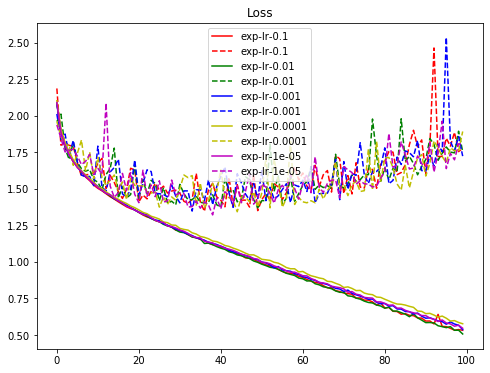

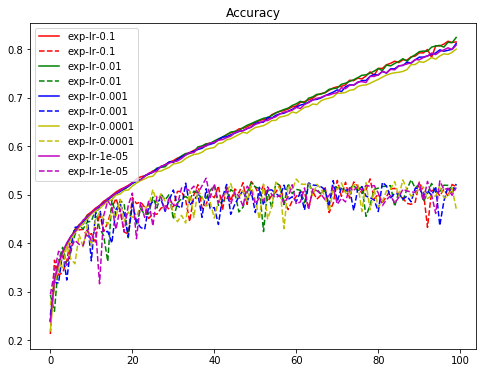

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()